This project will determine the best kind of movies for Microsoft to make.
First we will import the necessary packages, then we will load the web page to scrape. This page is a list of all-time grossing movies.

In [290]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import sqlite3
from matplotlib import pyplot as plt 
%matplotlib inline


In [2]:
html_page = requests.get('https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW')
soup = BeautifulSoup(html_page.content, 'html.parser') 

The table consists of four types of data: rank, title, lifetime gross, and year. Using the inspect element feature 
in the browser, it is evident that the rank is in mojo-field-type-rank; title in mojo-field-type-title, lifetime 
gross in mojo-field-type-rank, and release year in mojo-field-type-year

In [3]:
rank = soup.find('td', class_="mojo-field-type-rank")
rank 

<td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank">1</td>

We'll put the ranks of all the movies in a list.

In [4]:
rank_list = [r.text for r in soup.findAll('td', class_="mojo-field-type-rank")] 
print(len(rank_list), rank_list[:5])

200 ['1', '2', '3', '4', '5']


We'll then find the titles, gross earnings, and year released and put those in lists.

In [5]:
title = rank.nextSibling
title

<td class="a-text-left mojo-field-type-title"><a class="a-link-normal" href="/title/tt4154796/?ref_=bo_cso_table_1">Avengers: Endgame</a></td>

In [6]:
title_list = [t.text for t in soup.findAll('td', class_="mojo-field-type-title")] 
print(len(title_list), title_list[:5])

200 ['Avengers: Endgame', 'Avatar', 'Titanic', 'Star Wars: Episode VII - The Force Awakens', 'Avengers: Infinity War']


In [7]:
money = title.nextSibling
money

<td class="a-text-right mojo-field-type-money">$2,797,800,564</td>

In [8]:
money_list = [m.text for m in soup.findAll('td', class_="mojo-field-type-money")] 
print(len(money_list), money_list[:5])

200 ['$2,797,800,564', '$2,790,439,092', '$2,471,754,307', '$2,068,454,310', '$2,048,359,754']


In [9]:
year = money.nextSibling
year

<td class="a-text-left mojo-field-type-year"><a class="a-link-normal" href="/year/world/2019/?ref_=bo_cso_table_1">2019</a></td>

In [10]:
year_list = [y.text for y in soup.findAll('td', class_="mojo-field-type-year")] 
print(len(year_list), year_list[:5])

200 ['2019', '2009', '1997', '2015', '2018']


The links to the movie pages didn't have an attribute that was unique (it was the same for every link in the page). 
To get just the link, first I got a container with the url we need for each movie

In [11]:
link_list = [t for t in soup.findAll('td', class_="mojo-field-type-title")] 
print(len(link_list), link_list[0])

200 <td class="a-text-left mojo-field-type-title"><a class="a-link-normal" href="/title/tt4154796/?ref_=bo_cso_table_1">Avengers: Endgame</a></td>


Then I extracted just the href from each.

In [12]:
new_link_list = []
for t in link_list:
    link = [x.get('href') for x in t.findAll('a', class_="a-link-normal")]
    link_str = link[0]
    new_link_list.append(link_str)
print(len(new_link_list), new_link_list[0])

200 /title/tt4154796/?ref_=bo_cso_table_1


I put the lists into a dataframe.

In [13]:
df = pd.DataFrame([rank_list, title_list, new_link_list, money_list, year_list]).transpose()
df.columns = ['Lifetime_Rank', 'Movie_Title', 'Movie_Page', 'Lifetime_Gross', 'Year_Released']
df

,Lifetime_Rank,Movie_Title,Movie_Page,Lifetime_Gross,Year_Released
0,1,Avengers: Endgame,/title/tt4154796/?ref_=bo_cso_table_1,"$2,797,800,564",2019
1,2,Avatar,/title/tt0499549/?ref_=bo_cso_table_2,"$2,790,439,092",2009
2,3,Titanic,/title/tt0120338/?ref_=bo_cso_table_3,"$2,471,754,307",1997
3,4,Star Wars: Episode VII - The Force Awakens,/title/tt2488496/?ref_=bo_cso_table_4,"$2,068,454,310",2015
4,5,Avengers: Infinity War,/title/tt4154756/?ref_=bo_cso_table_5,"$2,048,359,754",2018
...,...,...,...,...,...
195,196,The Simpsons Movie,/title/tt0462538/?ref_=bo_cso_table_196,"$536,414,293",2007
196,197,The Revenant,/title/tt1663202/?ref_=bo_cso_table_197,"$532,950,503",2015
197,198,The Meg,/title/tt4779682/?ref_=bo_cso_table_198,"$530,259,473",2018
198,199,Ralph Breaks the Internet,/title/tt5848272/?ref_=bo_cso_table_199,"$529,323,962",2018


Now I repeated the process for the tables of top grossing films for 2019 and 2020.

In [14]:
# Get top grossing films, 2019, 2020
html_page2 = requests.get('https://www.boxofficemojo.com/year/2019/?ref_=bo_yl_table_3')
soup2 = BeautifulSoup(html_page2.content, 'html.parser') 
rank_2019 = soup2.find('td', class_="mojo-field-type-rank")
title_2019 = soup2.find('td', class_="mojo-field-type-release")
money_2019 = soup2.find('td', class_="mojo-field-type-money")
print(rank_2019, title_2019, money_2019)

<td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">1</td> <td class="a-text-left mojo-field-type-release mojo-cell-wide"><a class="a-link-normal" href="/release/rl3059975681/?ref_=bo_yld_table_1">Avengers: Endgame</a></td> <td class="a-text-right mojo-field-type-money hidden">-</td>


In [15]:
rank_2019_list = [r.text for r in soup2.findAll('td', class_="mojo-field-type-rank")] 
print(len(rank_2019_list), rank_2019_list[:5])
title_2019_list = [t.text for t in soup2.findAll('td', class_="mojo-field-type-release")] 
print(len(title_2019_list), title_2019_list[:5])
money_2019_list = [m.text for m in soup2.findAll('td', class_="mojo-field-type-money")] 
print(len(money_2019_list), money_2019_list[:5])

911 ['1', '2', '3', '4', '5']
911 ['Avengers: Endgame', 'The Lion King', 'Toy Story 4', 'Frozen II', 'Captain Marvel']
2733 ['-', '$858,373,000', '$858,373,000', '-', '$543,638,043']


In [16]:
revised_money_2019_list = []
for i in range(len(money_2019_list)):
    if i%3 == 1:
       revised_money_2019_list.append(money_2019_list[i])
print(len(revised_money_2019_list), revised_money_2019_list[:5])

911 ['$858,373,000', '$543,638,043', '$434,038,008', '$430,144,682', '$426,829,839']


In [17]:
# as in the first dataframe, I extracted the link to the page for each movie
link_list_2019 = [t for t in soup2.findAll('td', class_="mojo-field-type-release")] 
new_link_list_2019 = []
for t in link_list_2019:
    link = [x.get('href') for x in t.findAll('a', class_="a-link-normal")]
    link_str = link[0]
    new_link_list_2019.append(link_str)
print(len(new_link_list_2019), new_link_list_2019[0])

911 /release/rl3059975681/?ref_=bo_yld_table_1


In [18]:
df_2019 = pd.DataFrame([rank_2019_list, title_2019_list, new_link_list_2019, revised_money_2019_list]).transpose()
df_2019.columns = ['2019_Rank', 'Movie_Title', 'Movie_Page', '2019_Gross']
df_2019

,2019_Rank,Movie_Title,Movie_Page,2019_Gross
0,1,Avengers: Endgame,/release/rl3059975681/?ref_=bo_yld_table_1,"$858,373,000"
1,2,The Lion King,/release/rl3321923073/?ref_=bo_yld_table_2,"$543,638,043"
2,3,Toy Story 4,/release/rl3798500865/?ref_=bo_yld_table_3,"$434,038,008"
3,4,Frozen II,/release/rl2424210945/?ref_=bo_yld_table_4,"$430,144,682"
4,5,Captain Marvel,/release/rl3009644033/?ref_=bo_yld_table_5,"$426,829,839"
...,...,...,...,...
906,907,Henchmen,/release/rl1241941505/?ref_=bo_yld_table_907,$297
907,908,1945,/release/rl3506603521/?ref_=bo_yld_table_908,$236
908,909,Tall Tales from the Magical Garden of Antoon K...,/release/rl17401345/?ref_=bo_yld_table_909,$220
909,910,Over the Limit,/release/rl268928513/?ref_=bo_yld_table_910,$117


In [19]:
html_page3 = requests.get('https://www.boxofficemojo.com/year/2020/?grossesOption=calendarGrosses')
soup3 = BeautifulSoup(html_page3.content, 'html.parser') 

# retrieve the data for each column
rank_2020_list = [r.text for r in soup3.findAll('td', class_="mojo-field-type-rank")] 
title_2020_list = [t.text for t in soup3.findAll('td', class_="mojo-field-type-release")] 
money_2020_list = [m.text for m in soup3.findAll('td', class_="mojo-field-type-money")] 

# select only the money column of that year's gross
revised_money_2020_list = []
for i in range(len(money_2020_list)):
    if i%3 == 1:
       revised_money_2020_list.append(money_2020_list[i])
    
# as in the first dataframe, I extracted the link to the page for each movie
link_list_2020 = [t for t in soup3.findAll('td', class_="mojo-field-type-release")] 
new_link_list_2020 = []
for t in link_list_2020:
    link = [x.get('href') for x in t.findAll('a', class_="a-link-normal")]
    link_str = link[0]
    new_link_list_2020.append(link_str)
print(len(new_link_list_2020), new_link_list_2020[0])

# create the dataframe
df_2020 = pd.DataFrame([rank_2020_list, title_2020_list, new_link_list_2020, revised_money_2020_list]).transpose()
df_2020.columns = ['2020_Rank', 'Movie_Title', 'Movie_Page', '2020_Gross']
df_2020

454 /release/rl1182631425/?ref_=bo_yld_table_1


,2020_Rank,Movie_Title,Movie_Page,2020_Gross
0,1,Bad Boys for Life,/release/rl1182631425/?ref_=bo_yld_table_1,"$204,417,855"
1,2,1917,/release/rl2969994753/?ref_=bo_yld_table_2,"$157,901,466"
2,3,Sonic the Hedgehog,/release/rl4244997633/?ref_=bo_yld_table_3,"$146,066,470"
3,4,Jumanji: The Next Level,/release/rl755467777/?ref_=bo_yld_table_4,"$124,736,710"
4,5,Star Wars: Episode IX - The Rise of Skywalker,/release/rl3305145857/?ref_=bo_yld_table_5,"$124,496,308"
...,...,...,...,...
449,450,Asako I & II,/release/rl1359513089/?ref_=bo_yld_table_450,$231
450,451,Chained for Life,/release/rl1292600833/?ref_=bo_yld_table_451,$115
451,452,Shooting the Mafia,/release/rl2366342657/?ref_=bo_yld_table_452,$88
452,453,Benjamin the Elephant (2020),/release/rl1180795649/?ref_=bo_yld_table_453,$49


I limited my dataframes to the top 200 grossing movies of each year.

In [20]:
df_2020 = df_2020.drop(df_2020.index[200:])
df_2020

,2020_Rank,Movie_Title,Movie_Page,2020_Gross
0,1,Bad Boys for Life,/release/rl1182631425/?ref_=bo_yld_table_1,"$204,417,855"
1,2,1917,/release/rl2969994753/?ref_=bo_yld_table_2,"$157,901,466"
2,3,Sonic the Hedgehog,/release/rl4244997633/?ref_=bo_yld_table_3,"$146,066,470"
3,4,Jumanji: The Next Level,/release/rl755467777/?ref_=bo_yld_table_4,"$124,736,710"
4,5,Star Wars: Episode IX - The Rise of Skywalker,/release/rl3305145857/?ref_=bo_yld_table_5,"$124,496,308"
...,...,...,...,...
195,196,Extra Ordinary,/release/rl2562359809/?ref_=bo_yld_table_196,"$164,346"
196,197,Palm Springs,/release/rl3175187201/?ref_=bo_yld_table_197,"$164,000"
197,198,A Call to Spy,/release/rl3796140801/?ref_=bo_yld_table_198,"$158,864"
198,199,Love Story50th Anniversary,/release/rl934707713/?ref_=bo_yld_table_199,"$153,504"


In [21]:
df_2019 = df_2019.drop(df_2019.index[200:])
df_2019

,2019_Rank,Movie_Title,Movie_Page,2019_Gross
0,1,Avengers: Endgame,/release/rl3059975681/?ref_=bo_yld_table_1,"$858,373,000"
1,2,The Lion King,/release/rl3321923073/?ref_=bo_yld_table_2,"$543,638,043"
2,3,Toy Story 4,/release/rl3798500865/?ref_=bo_yld_table_3,"$434,038,008"
3,4,Frozen II,/release/rl2424210945/?ref_=bo_yld_table_4,"$430,144,682"
4,5,Captain Marvel,/release/rl3009644033/?ref_=bo_yld_table_5,"$426,829,839"
...,...,...,...,...
195,196,Welcome to Marwen,/release/rl2264958465/?ref_=bo_yld_table_196,"$2,405,625"
196,197,"My People, My Country",/release/rl2433451521/?ref_=bo_yld_table_197,"$2,356,683"
197,198,Promare,/release/rl3104540161/?ref_=bo_yld_table_198,"$2,287,950"
198,199,Super 30,/release/rl4211639809/?ref_=bo_yld_table_199,"$2,269,878"


Merging the three dataframes.

In [22]:
df_new = pd.merge(df, df_2019, on = "Movie_Title", how = "outer") 
len(df_new)

382

In [23]:
df_new2 = pd.merge(df_new, df_2020, on = "Movie_Title", how = "outer") 
len(df_new2)

551

Move the movie link data from the secondary and tertiary columns into the primary link column.

In [24]:
i = 0
for j in range(0, 551):
    if df_new2.isnull().Movie_Page_x[i]:
        df_new2.Movie_Page_x[i] = df_new2.Movie_Page[i]
    if df_new2.isnull().Movie_Page_x[i]:
        df_new2.Movie_Page_x[i] = df_new2.Movie_Page_y[i]
    i +=1
# Then count the NaN cells to make sure there are none
count = df_new2["Movie_Page_x"].isna().sum()
count

0

For the 2019 and 2020 ranked movies, filled in the year released in the Year_Released column.

In [25]:
for y in df_new2.index:
    if pd.isna(df_new2['Year_Released'][y]) == True and pd.isna(df_new2['2019_Rank'][y]) == False:
        df_new2.Year_Released[y] = 2019
        
for y in df_new2.index:
    if pd.isna(df_new2['Year_Released'][y]) == True and pd.isna(df_new2['2020_Rank'][y]) == False:
        df_new2.Year_Released[y] = 2020

Scrape the web site for the domestic gross, budget, MPAA rating and genres of each movie.

In [215]:
movie_url_list = []
gross_master_list = []
budget_master_list = []
mpaa_master_list = []
genres_master_list = []

j=0
    
for m in df_new2.Movie_Title:
    movie_url = 'https://www.boxofficemojo.com' + df_new2.Movie_Page_x[j]
#     movie_url_list.append(movie_url)
    html_page5 = requests.get(movie_url)
    soup5 = BeautifulSoup(html_page5.content, 'html.parser')
    
# the domestic gross from the first span tag
    gross = soup5.find('span', class_="money")
    gross = str(gross)
    gross = gross[20:-7]

# the budget is not the first span tag with the money class, so it took extra steps
    budget = soup5.find_all('span', text=re.compile('Budget')) 
    budget_parent = []
    budget_parent = [budget.parent for budget in budget]
    if not budget_parent:
        budget_money = [np.nan]
    else:
        budget_parent_string = budget_parent[0]
        budget_money = [m.text for m in budget_parent_string.findAll('span', class_="money")]
    budget_money_string = budget_money[0]

# likewise for MPAA rating
    mpaa = soup5.find_all('span', text=re.compile('MPAA'))
    mpaa_parent = []
    mpaa_parent = [mpaa.parent for mpaa in mpaa]
    if not mpaa_parent:
        mpaa_rating = [np.nan, np.nan]
    else:
        mpaa_parent_string = mpaa_parent[0]
        mpaa_rating = [m.text for m in mpaa_parent_string.findAll('span')]
    mpaa_rating_string = mpaa_rating[1]

# #likewise for genres
    genres = soup5.find_all('span', text=re.compile('Genres')) 
    genres_parent = []
    genres_parent = [genres.parent for genres in genres]
    if not genres_parent:
        genres_categories = [np.nan, np.nan]
    else:
        genres_parent_string = genres_parent[0]
        genres_categories = [m.text for m in genres_parent_string.findAll('span')]
    genres_categories_string = genres_categories[1]

    gross_master_list.append(gross)
    budget_master_list.append(budget_money_string)
    mpaa_master_list.append(mpaa_rating_string)
    genres_master_list.append(genres_categories_string)
    
    j += 1
    if j > 550:
        break
 

Check the length of the lists.

In [37]:
len(gross_master_list), len(budget_master_list), len(mpaa_master_list), len(genres_master_list)

(551, 551, 551, 551)

In [38]:
genres_master_list[0]

'Action\n    \n        Adventure\n    \n        Drama\n    \n        Sci-Fi'

Make the genre categories for each movie a list.

In [56]:
movie_genres_list = []
genres_master_list_split = []
for x in genres_master_list:
    if type(x) == str:
        movie_genres_list = list(x.split("\n    \n        "))
    else:
        movie_genres_list = []
    genres_master_list_split.append(movie_genres_list)
genres_master_list_split[:5]

[['Action', 'Adventure', 'Drama', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi']]

Add lists of scraped data to the master dataframe.

In [57]:
df_new2['Domestic_Gross']= gross_master_list
df_new2['Budget'] = budget_master_list
df_new2['MPAA'] = mpaa_master_list
df_new2['Genres'] = genres_master_list_split
df_new2.head()

,Lifetime_Rank,Movie_Title,Movie_Page_x,Lifetime_Gross,Year_Released,2019_Rank,Movie_Page_y,2019_Gross,2020_Rank,Movie_Page,2020_Gross,Domestic_Gross,Budget,MPAA,Genres
0,1,Avengers: Endgame,/title/tt4154796/?ref_=bo_cso_table_1,"$2,797,800,564",2019,1,/release/rl3059975681/?ref_=bo_yld_table_1,"$858,373,000",NaN,NaN,NaN,"$858,373,000","$356,000,000",PG-13,"[Action, Adventure, Drama, Sci-Fi]"
1,2,Avatar,/title/tt0499549/?ref_=bo_cso_table_2,"$2,790,439,092",2009,NaN,NaN,NaN,NaN,NaN,NaN,"$760,507,625","$237,000,000",PG-13,"[Action, Adventure, Fantasy, Sci-Fi]"
2,3,Titanic,/title/tt0120338/?ref_=bo_cso_table_3,"$2,471,754,307",1997,NaN,NaN,NaN,NaN,NaN,NaN,"$659,363,944","$200,000,000",PG-13,"[Drama, Romance]"
3,4,Star Wars: Episode VII - The Force Awakens,/title/tt2488496/?ref_=bo_cso_table_4,"$2,068,454,310",2015,NaN,NaN,NaN,NaN,NaN,NaN,"$936,662,225","$245,000,000",PG-13,"[Action, Adventure, Sci-Fi]"
4,5,Avengers: Infinity War,/title/tt4154756/?ref_=bo_cso_table_5,"$2,048,359,754",2018,NaN,NaN,NaN,NaN,NaN,NaN,"$678,815,482",None,PG-13,"[Action, Adventure, Sci-Fi]"


In [ ]:
Deleted unnecessary columns to streamline the database and prevent complications when saving to sqlite

In [58]:
del df_new2['2019_Rank']
del df_new2['2019_Gross']
del df_new2['2020_Rank']
del df_new2['2020_Gross']
del df_new2['Movie_Page']
del df_new2['Movie_Page_y']
del df_new2['Lifetime_Gross']
del df_new2['Lifetime_Rank']

df_new2.tail()

,Movie_Title,Movie_Page_x,Year_Released,Domestic_Gross,Budget,MPAA,Genres
546,Extra Ordinary,/release/rl2562359809/?ref_=bo_yld_table_196,2020,"$164,346",None,R,"[Comedy, Fantasy, Horror]"
547,Palm Springs,/release/rl3175187201/?ref_=bo_yld_table_197,2020,"$164,000",None,R,"[Comedy, Fantasy, Mystery, Romance]"
548,A Call to Spy,/release/rl3796140801/?ref_=bo_yld_table_198,2020,"$159,014",None,PG-13,"[Biography, Crime, Drama, Thriller, War]"
549,Love Story50th Anniversary,/release/rl934707713/?ref_=bo_yld_table_199,2020,"$153,504",None,PG,"[Drama, Romance]"
550,The Dark and the Wicked,/release/rl4015883009/?ref_=bo_yld_table_200,2020,"$156,552",None,None,[Horror]


Put the scraped data in a dataframe so that it can be saved as a sqlite db. I don't want to do the scraping over and rehit the web site unnecessarily.

In [59]:
df_scraped_data = pd.DataFrame(list(zip(gross_master_list, budget_master_list, mpaa_master_list, genres_master_list)), 
               columns =['Domestic_Gross', 'Budget', 'MPAA', 'Genres']) 
df_scraped_data.head()

,Domestic_Gross,Budget,MPAA,Genres
0,"$858,373,000","$356,000,000",PG-13,Action\n \n Adventure\n \n ...
1,"$760,507,625","$237,000,000",PG-13,Action\n \n Adventure\n \n ...
2,"$659,363,944","$200,000,000",PG-13,Drama\n \n Romance
3,"$936,662,225","$245,000,000",PG-13,Action\n \n Adventure\n \n ...
4,"$678,815,482",None,PG-13,Action\n \n Adventure\n \n ...


Create a sqlite db to and put the scraped data in it.

In [26]:
conn = sqlite3.connect('scraped_data2.db') 
c = conn.cursor()

c.execute('CREATE TABLE scraped_data2 (Domestic_Gross, Budget, MPAA, Genres)')
conn.commit()

df_scraped_data.to_sql('scraped_data2', conn, if_exists='replace', index = False)


In [27]:
cnx = sqlite3.connect('scraped_data2.db')

df_imported = pd.read_sql_query("SELECT * FROM scraped_data2", cnx)
df_imported.head()

,Domestic_Gross,Budget,MPAA,Genres
0,"$858,373,000","$356,000,000",PG-13,Action\n \n Adventure\n \n ...
1,"$760,507,625","$237,000,000",PG-13,Action\n \n Adventure\n \n ...
2,"$659,363,944","$200,000,000",PG-13,Drama\n \n Romance
3,"$936,662,225","$245,000,000",PG-13,Action\n \n Adventure\n \n ...
4,"$678,815,482",None,PG-13,Action\n \n Adventure\n \n ...


In [62]:
df_new2['Domestic_Gross'][:5]

0    $858,373,000
1    $760,507,625
2    $659,363,944
3    $936,662,225
4    $678,815,482
Name: Domestic_Gross, dtype: object

Converted strings in Domestic Gross and Budget columns to integers, removing the commas and dollar signs.

In [160]:
i = 0
for y in df_new2:
    df_new2['Domestic_Gross'][i] = df_new2['Domestic_Gross'][i].replace(',', '')
    df_new2['Domestic_Gross'][i] = df_new2['Domestic_Gross'][i].replace('$', '')
    i +=1
df_new2['Domestic_Gross'][:5]

0    858373000
1    760507625
2    659363944
3    936662225
4    678815482
Name: Domestic_Gross, dtype: object

In [244]:
i = 0
for y in df_new2:
    if type(df_new2['Budget'][i]) == str:
        df_new2['Budget'][i] = df_new2['Budget'][i].replace(',', '')
        df_new2['Budget'][i] = df_new2['Budget'][i].replace('$', '')
    i += 1
df_new2['Budget'][:5]

0    356000000
1    237000000
2    200000000
3    245000000
4         None
Name: Budget, dtype: object

Checked the data.

In [245]:
j = 0
for y in df_new2.index:
        print(j, type(df_new2.Budget[j]), df_new2.Budget[j])
        j += 1

0 <class 'str'> 356000000
1 <class 'str'> 237000000
2 <class 'str'> 200000000
3 <class 'str'> 245000000
4 <class 'NoneType'> None
5 <class 'str'> 150000000
6 <class 'str'> 260000000
7 <class 'str'> 45000000
8 <class 'str'> 220000000
9 <class 'str'> 190000000
10 <class 'str'> 150000000
11 <class 'str'> 250000000
12 <class 'NoneType'> None
13 <class 'NoneType'> None
14 <class 'str'> 317000000
15 <class 'str'> 170000000
16 <class 'str'> 150000000
17 <class 'str'> 160000000
18 <class 'NoneType'> None
19 <class 'str'> 250000000
20 <class 'str'> 200000000
21 <class 'str'> 74000000
22 <class 'str'> 250000000
23 <class 'NoneType'> None
24 <class 'str'> 94000000
25 <class 'str'> 160000000
26 <class 'str'> 160000000
27 <class 'str'> 195000000
28 <class 'str'> 200000000
29 <class 'str'> 200000000
30 <class 'str'> 210000000
31 <class 'str'> 250000000
32 <class 'str'> 55000000
33 <class 'str'> 275000000
34 <class 'str'> 200000000
35 <class 'str'> 200000000
36 <class 'str'> 225000000
37 <class 'str'

520 <class 'NoneType'> None
521 <class 'NoneType'> None
522 <class 'NoneType'> None
523 <class 'str'> 149000000
524 <class 'str'> 19000000
525 <class 'str'> 52000000
526 <class 'NoneType'> None
527 <class 'NoneType'> None
528 <class 'NoneType'> None
529 <class 'NoneType'> None
530 <class 'NoneType'> None
531 <class 'NoneType'> None
532 <class 'str'> 150000000
533 <class 'NoneType'> None
534 <class 'NoneType'> None
535 <class 'NoneType'> None
536 <class 'NoneType'> None
537 <class 'NoneType'> None
538 <class 'NoneType'> None
539 <class 'NoneType'> None
540 <class 'NoneType'> None
541 <class 'NoneType'> None
542 <class 'NoneType'> None
543 <class 'NoneType'> None
544 <class 'NoneType'> None
545 <class 'NoneType'> None
546 <class 'NoneType'> None
547 <class 'NoneType'> None
548 <class 'NoneType'> None
549 <class 'NoneType'> None
550 <class 'NoneType'> None


Converted Domestic Gross and Budget to numeric datatypes.

In [246]:
df_new2[["Domestic_Gross", "Budget"]] = df_new2[["Domestic_Gross", "Budget"]].apply(pd.to_numeric)
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 550
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie_Title     551 non-null    object 
 1   Movie_Page_x    551 non-null    object 
 2   Year_Released   551 non-null    object 
 3   Domestic_Gross  551 non-null    int64  
 4   Budget          325 non-null    float64
 5   MPAA            486 non-null    object 
 6   Genres          551 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.4+ KB


In [528]:
pg13_gross_sum = 0
pg13_count = 0
for x in df_new2.index:
    if df_new2['MPAA'][x] == 'PG-13':
#         print(df_new2['Domestic_Gross'][x], df_new2['Movie_Title'][x])
        pg13_count += 1
        pg13_gross_sum = pg13_gross_sum + df_new2['Domestic_Gross'][x]
pg13_mean = pg13_gross_sum/pg13_count
print(pg13_count, pg13_gross_sum, pg13_mean)
        


218 40433807280 185476180.18348625


In [530]:
int(df_new2.Domestic_Gross.mean())

125597662

In [546]:
g_movies = df_new2[df_new2["MPAA"].isin(['G'])]
pg_movies = df_new2[df_new2["MPAA"].isin(['PG'])]
pg13_movies = df_new2[df_new2["MPAA"].isin(['PG-13'])]
r_movies = df_new2[df_new2["MPAA"].isin(['R'])]
all_movies = df_new2[df_new2["MPAA"].isin(['G', 'PG', 'PG-13', 'R'])]
len(all_movies.index), all_movies.Domestic_Gross.sum(), all_movies.Domestic_Gross.mean()

(484, 67870218970, 140227725.1446281)

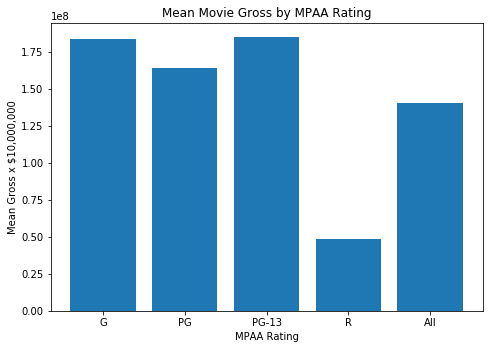

In [553]:
from matplotlib import pyplot as plt 
%matplotlib inline

ave_gross_by_mpaa_x = ['G', 'PG', 'PG-13', 'R', 'All']
ave_gross_by_mpaa_y = [g_movies.Domestic_Gross.mean(), pg_movies.Domestic_Gross.mean(), pg13_movies.Domestic_Gross.mean(), r_movies.Domestic_Gross.mean(), all_movies.Domestic_Gross.mean()]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ave_gross_by_mpaa_x, ave_gross_by_mpaa_y)
plt.xlabel('MPAA Rating')
plt.ylabel('Mean Gross x $10,000,000')
plt.title("Mean Movie Gross by MPAA Rating")
plt.show()

In [554]:
len(df_new2.Genres[0])

4

In [565]:
genres1_gross_sum = 0
genres1_count = 0
for x in df_new2.index:
    if len(df_new2['Genres'][x]) == 1:
#         print(df_new2['Movie_Title'][x])
        genres1_count += 1
        genres1_gross_sum = genres1_gross_sum + df_new2['Domestic_Gross'][x]
genres1_mean = genres1_gross_sum/genres1_count
print(genres1_count, genres1_gross_sum, genres1_mean)
 

42 1412293944 33626046.28571428


In [567]:
genres2_gross_sum = 0
genres2_count = 0
for x in df_new2.index:
    if len(df_new2['Genres'][x]) == 2:
#         print(df_new2['Movie_Title'][x])
        genres2_count += 1
        genres2_gross_sum = genres2_gross_sum + df_new2['Domestic_Gross'][x]
genres2_mean = genres2_gross_sum/genres2_count
print(genres2_count, genres2_gross_sum, genres2_mean)


90 4982444270 55360491.88888889


In [572]:
genres3_gross_sum = 0
genres3_count = 0
for x in df_new2.index:
    if len(df_new2['Genres'][x]) == 3:
#         print(df_new2['Movie_Title'][x])
        genres3_count += 1
        genres3_gross_sum = genres3_gross_sum + df_new2['Domestic_Gross'][x]
genres3_mean = genres3_gross_sum/genres3_count
print(genres3_count, genres3_gross_sum, genres3_mean)


176 24087245007 136859346.6306818


In [573]:
genres4_gross_sum = 0
genres4_count = 0
for x in df_new2.index:
    if len(df_new2['Genres'][x]) == 4:
#         print(df_new2['Movie_Title'][x])
        genres4_count += 1
        genres4_gross_sum = genres4_gross_sum + df_new2['Domestic_Gross'][x]
genres4_mean = genres4_gross_sum/genres4_count
print(genres4_count, genres4_gross_sum, genres4_mean)


147 23461515490 159602146.19047618


In [575]:
genres5_gross_sum = 0
genres5_count = 0
for x in df_new2.index:
    if len(df_new2['Genres'][x]) == 5:
#         print(df_new2['Movie_Title'][x])
        genres5_count += 1
        genres5_gross_sum = genres5_gross_sum + df_new2['Domestic_Gross'][x]
genres5_mean = genres5_gross_sum/genres5_count
print(genres5_count, genres5_gross_sum, genres5_mean)


64 9887616519 154494008.109375


In [576]:
genres6_gross_sum = 0
genres6_count = 0
for x in df_new2.index:
    if len(df_new2['Genres'][x]) == 6:
#         print(df_new2['Movie_Title'][x])
        genres6_count += 1
        genres6_gross_sum = genres6_gross_sum + df_new2['Domestic_Gross'][x]
genres6_mean = genres6_gross_sum/genres6_count
print(genres6_count, genres6_gross_sum, genres6_mean)


24 4542994780 189291449.16666666


In [577]:
genres7_gross_sum = 0
genres7_count = 0
for x in df_new2.index:
    if len(df_new2['Genres'][x]) == 7:
#         print(df_new2['Movie_Title'][x])
        genres7_count += 1
        genres7_gross_sum = genres7_gross_sum + df_new2['Domestic_Gross'][x]
genres7_mean = genres7_gross_sum/genres7_count
print(genres7_count, genres7_gross_sum, genres7_mean)


5 824352996 164870599.2


In [578]:
genres8_gross_sum = 0
genres8_count = 0
for x in df_new2.index:
    if len(df_new2['Genres'][x]) == 8:
#         print(df_new2['Movie_Title'][x])
        genres8_count += 1
        genres8_gross_sum = genres8_gross_sum + df_new2['Domestic_Gross'][x]
genres8_mean = genres8_gross_sum/genres8_count
print(genres8_count, genres8_gross_sum, genres8_mean)


1 2313596 2313596.0


In [579]:
genres0_count = 0
for x in df_new2.index:
    if len(df_new2['Genres'][x]) == 0:
#         print(df_new2['Movie_Title'][x])
        genres0_count += 1
print(genres0_count)


2


In [596]:
genres9_count = 0
for x in df_new2.index:
    if len(df_new2['Genres'][x]) > 8:
#         print(df_new2['Movie_Title'][x])
        genres9_count += 1
print(genres9_count)


0


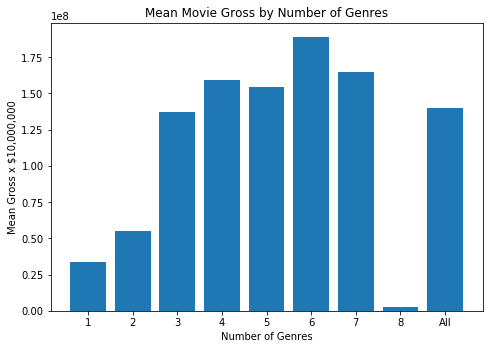

In [599]:
ave_gross_by_genres_count_x = ["1", "2", "3", "4", "5", "6", "7", "8", "All"]
ave_gross_by_genres_count_y = [genres1_mean, genres2_mean, genres3_mean, genres4_mean, genres5_mean, genres6_mean, genres7_mean, genres8_mean, all_movies.Domestic_Gross.mean()]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ave_gross_by_genres_count_x, ave_gross_by_genres_count_y)
plt.xlabel('Number of Genres')
plt.ylabel('Mean Gross x $10,000,000')
plt.title("Mean Movie Gross by Number of Genres")
plt.show()

In [247]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

to_1D(df_new2['Genres']).value_counts()

Adventure      249
Drama          212
Action         205
Comedy         183
Fantasy        150
Thriller       134
Sci-Fi         129
Family         115
Animation       80
Romance         63
Horror          60
Mystery         58
Crime           48
Biography       41
Music           25
Documentary     22
Musical         21
History         18
War             17
Sport           13
Western          2
dtype: int64

In [272]:
df_genres = pd.DataFrame(to_1D(df_new2['Genres']).value_counts())
df_genres.columns =['Genre_Count'] 
df_genres.head()

,Genre_Count
Adventure,249
Drama,212
Action,205
Comedy,183
Fantasy,150


In [287]:
Genres_sum = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
Genres_mean = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
df_genres['Genres_sum'] = Genres_sum
df_genres['Genres_mean'] = Genres_mean
df_genres.head(21)

,Genre_Count,Genres_sum,Genres_mean
Adventure,249,0,0
Drama,212,0,0
Action,205,0,0
Comedy,183,0,0
Fantasy,150,0,0
Thriller,134,0,0
Sci-Fi,129,0,0
Family,115,0,0
Animation,80,0,0
Romance,63,0,0


In [288]:
for x in df_new2.index:
    for y in range(0, len(df_genres.index)):
        genre = df_genres.index[y]
        if df_new2.Genres[x].count(genre) > 0:
            df_genres.Genres_sum[y] = df_genres.Genres_sum[y] + df_new2.Domestic_Gross[x]
for y in df_genres.index:
    df_genres.Genres_mean[y] = df_genres.Genres_sum[y]/df_genres.Genre_Count[y]
df_genres.head(21)

,Genre_Count,Genres_sum,Genres_mean
Adventure,249,55725412932,223796839
Drama,212,14646233906,69086008
Action,205,40388646780,197017789
Comedy,183,19426535979,106155934
Fantasy,150,26693707471,177958049
Thriller,134,11758668930,87751260
Sci-Fi,129,30576875898,237030045
Family,115,20665788211,179702506
Animation,80,14511887217,181398590
Romance,63,5901723897,93678157


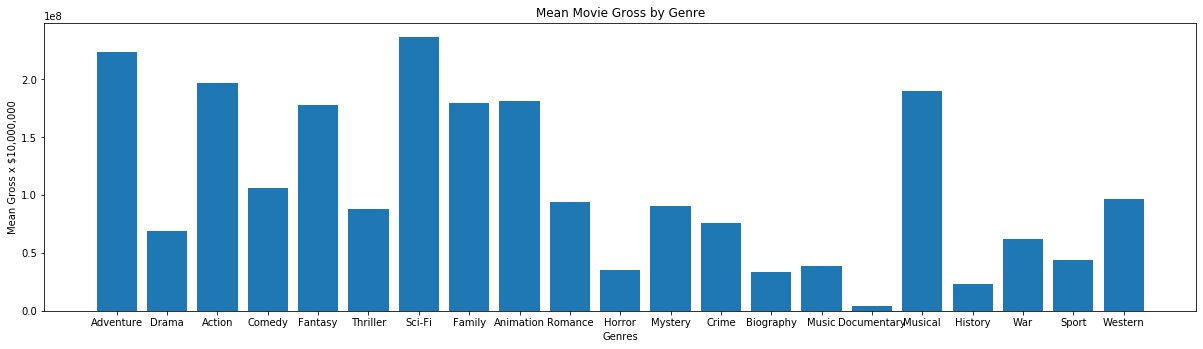

In [303]:
df_genres.sort_values('Genres_mean', ascending = False)

ave_gross_by_genre_x = df_genres.index.tolist()
ave_gross_by_genre_y = df_genres["Genres_mean"].tolist()

fig = plt.figure(figsize = (16,4))

ax = fig.add_axes([0,0,1,1])
ax.bar(x='State', 
            y="Growth", data=df,  
            order=df.sort_values('Growth').State)
plt.xlabel('Genres')
plt.ylabel('Mean Gross x $10,000,000')
plt.title("Mean Movie Gross by Genre")
plt.show()

In [302]:
df_genres.sort_values('Genres_mean', ascending = False)


,Genre_Count,Genres_sum,Genres_mean
Sci-Fi,129,30576875898,237030045
Adventure,249,55725412932,223796839
Action,205,40388646780,197017789
Musical,21,3994885050,190232621
Animation,80,14511887217,181398590
Family,115,20665788211,179702506
Fantasy,150,26693707471,177958049
Comedy,183,19426535979,106155934
Western,2,194064304,97032152
Romance,63,5901723897,93678157


Reset the index in the genres dataframe.

In [305]:
df_genres.reset_index(inplace=True)
df_genres = df_genres.rename(columns = {'index':'Genre'})
df_genres.head()

,Genre,Genre_Count,Genres_sum,Genres_mean
0,Adventure,249,55725412932,223796839
1,Drama,212,14646233906,69086008
2,Action,205,40388646780,197017789
3,Comedy,183,19426535979,106155934
4,Fantasy,150,26693707471,177958049


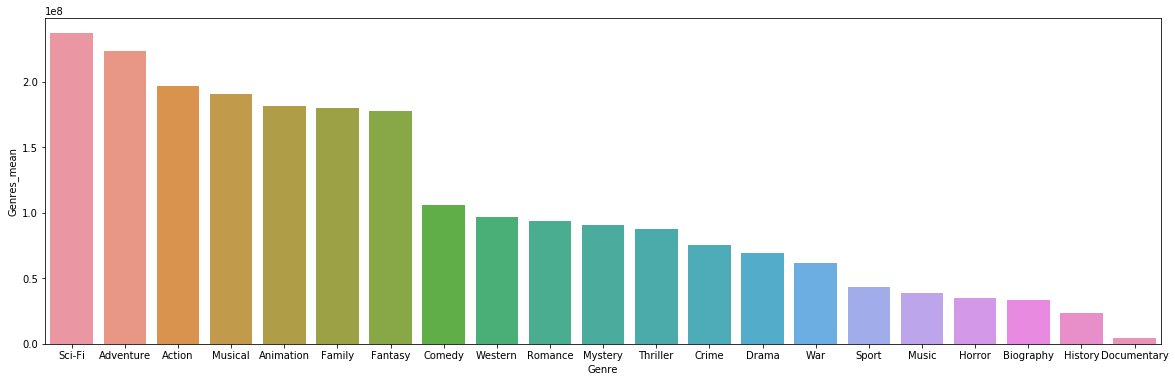

In [318]:
# df_genres.sort_values('Genres_mean', ascending = False)

# ave_gross_by_genre_x = df_genres.index.tolist()
# ave_gross_by_genre_y = df_genres["Genres_mean"].tolist()
import seaborn as sns
import pandas.util.testing as tm

plt.figure(figsize=(20, 6))
sns.barplot(x='Genre', 
            y="Genres_mean", data=df_genres,  
            order=df_genres.sort_values('Genres_mean', ascending = False).Genre)
